In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import the database tsv
df = pd.read_csv('/content/WikiArt-Emotions-Ag4.tsv', sep='\t')

In [ ]:
df

,ID,Style,Category,Artist,Title,Year,Is painting,Face/body,Ave. art rating,Art (image+title): agreeableness,...,TitleOnly: love,TitleOnly: optimism,TitleOnly: pessimism,TitleOnly: regret,TitleOnly: sadness,TitleOnly: shame,TitleOnly: shyness,TitleOnly: surprise,TitleOnly: trust,TitleOnly: neutral
0,58c6237dedc2c9c7dc0de1ae,Modern Art,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,yes,face,2.33,0,...,0,0,0,0,0,0,0,0,0,0
1,577280dfedc2cb3880f28e76,Modern Art,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,yes,body,0.70,0,...,0,0,0,0,0,0,0,0,0,0
2,57727f2dedc2cb3880ed5fa9,Modern Art,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,yes,face,1.60,0,...,0,0,0,0,0,0,0,0,0,0
3,58d1240cedc2c94f900fc610,Modern Art,Cubism,Vadym Meller,Monk. For the Play &#39;Mazeppa&#39;,1920,yes,face,0.82,0,...,0,0,0,0,0,0,0,0,0,0
4,57727de7edc2cb3880e91f26,Post Renaissance Art,Romanticism,David Wilkie,The Defence of Sarago&#231;a,1828,yes,face,1.69,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4100,577287aeedc2cb388007fba9,Modern Art,Color Field Painting,Rupprecht Geiger,OE 260,1957,yes,none,1.09,0,...,0,0,0,0,0,0,0,0,0,0
4101,57728001edc2cb3880efddcf,Modern Art,Surrealism,Oscar Dominguez,M&#225;quina de coser electro-sexual,1934,yes,body,0.10,0,...,0,0,0,0,0,0,0,0,0,0
4102,57728ac7edc2cb3880123cc2,Modern Art,Neo-Expressionism,Georg Baselitz,Female Nude on a Kitchen Chair,1979,yes,body,-0.23,0,...,0,0,0,0,0,0,0,0,0,0
4103,57728412edc2cb3880fc9ff4,Modern Art,Expressionism,Marie Laurencin,Apollinaire and His Friends,1909,yes,face,1.08,0,...,0,1,0,0,0,0,0,0,0,0


# Initial Data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105 entries, 0 to 4104
Data columns (total 69 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   4105 non-null   object 
 1   Style                                4105 non-null   object 
 2   Category                             4105 non-null   object 
 3   Artist                               4105 non-null   object 
 4   Title                                4105 non-null   object 
 5   Year                                 4105 non-null   object 
 6   Is painting                          4105 non-null   object 
 7   Face/body                            4105 non-null   object 
 8   Ave. art rating                      4105 non-null   float64
 9   Art (image+title): agreeableness     4105 non-null   int64  
 10  Art (image+title): anger             4105 non-null   int64  
 11  Art (image+title): anticipatio

In [ ]:
df.value_counts('Category')

,count
Category,
Baroque,200
Realism,200
Rococo,199
Pop Art,199
Impressionism,199
Neo-Expressionism,198
Art Informel,197
Post-Impressionism,196
Minimalism,193


In [ ]:
average_ratings = df.groupby("Category")["Ave. art rating"].mean().reset_index()

# Rename column for clarity
average_ratings.rename(columns={"Ave. art rating": "Average Rating"}, inplace=True)

# Display result
print(average_ratings)

                                       Category  Average Rating
0                                  Abstract Art        0.274866
1           Abstract Art,Abstract Expressionism        0.630000
2             Abstract Art,Color Field Painting        0.000000
3                           Abstract Art,Cubism        0.692857
4               Abstract Art,Post-Impressionism        0.600000
5                       Abstract Art,Surrealism        0.683333
6                        Abstract Expressionism        0.171990
7   Abstract Expressionism,Color Field Painting       -0.025000
8    Abstract Expressionism,Lyrical Abstraction        0.400000
9             Abstract Expressionism,Minimalism       -0.483333
10            Abstract Expressionism,Surrealism        0.270000
11                                 Art Informel        0.030254
12                   Art Informel,Magic Realism        0.425000
13                      Art Informel,Minimalism        0.200000
14                                      

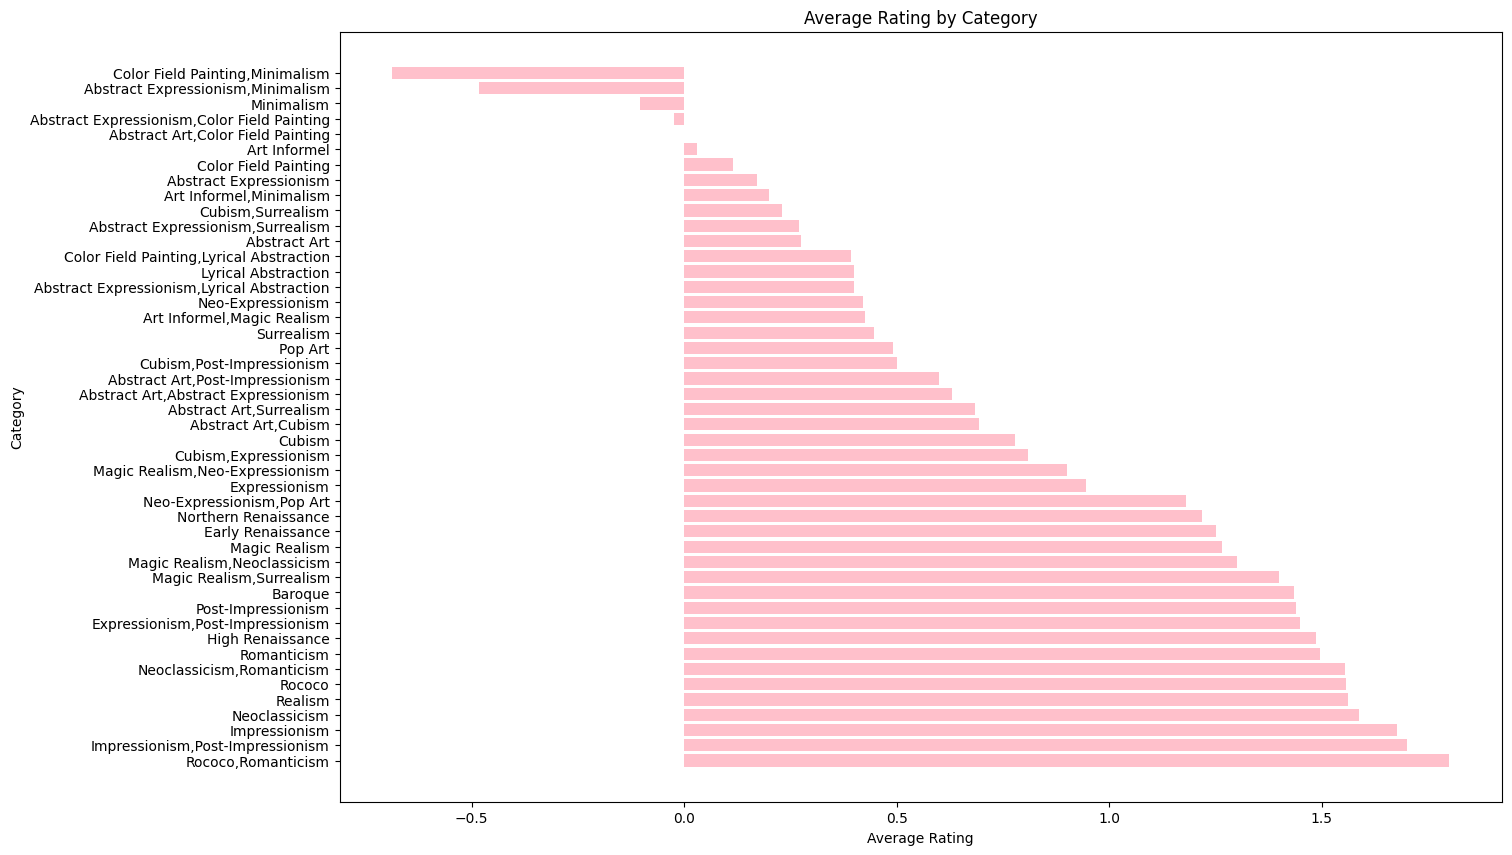

In [ ]:
average_ratings = average_ratings.sort_values("Average Rating", ascending=False)

#bar chart
plt.figure(figsize=(15, 10))
plt.barh(average_ratings["Category"], average_ratings["Average Rating"], color="pink")

# Labels and title
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.title("Average Rating by Category")

# Show plot
plt.show()

In [ ]:
#top 10 categories by average rating
top_10_categories = average_ratings.nlargest(10, "Average Rating")
df_top_10 = df[df["Category"].isin(top_10_categories["Category"])]

# splitting the face/body category
df_top_10["Face"] = df_top_10["Face/body"].apply(lambda x: 1 if "face" in str(x).lower() else 0)
df_top_10["Body"] = df_top_10["Face/body"].apply(lambda x: 1 if "body" in str(x).lower() else 0)
df_top_10["None"] = df_top_10["Face/body"].apply(lambda x: 1 if "none" in str(x).lower() else 0) # Create a new column 'None' instead of overwriting df_top_10
df_top_10_filtered = df_top_10[["Ave. art rating", "Face", "Body","None"]] #Now select columns from the DataFrame

<ipython-input-8-1abc4abd6fda>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10["Face"] = df_top_10["Face/body"].apply(lambda x: 1 if "face" in str(x).lower() else 0)
<ipython-input-8-1abc4abd6fda>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10["Body"] = df_top_10["Face/body"].apply(lambda x: 1 if "body" in str(x).lower() else 0)
<ipython-input-8-1abc4abd6fda>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

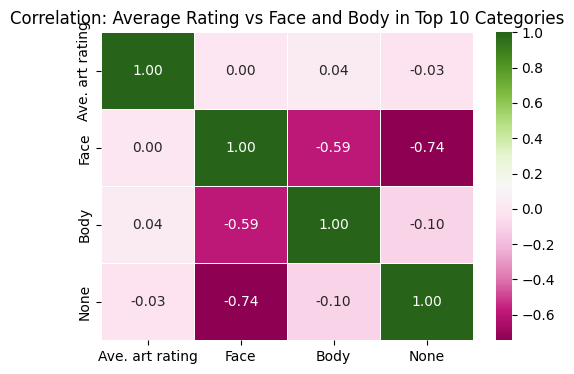

In [ ]:
#heatmap
correlation = df_top_10_filtered.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="PiYG", fmt=".2f", linewidths=0.5)

plt.title("Correlation: Average Rating vs Face and Body in Top 10 Categories")
plt.show()

#Cleaning up the dataframe

In [ ]:
df

,ID,Style,Category,Artist,Title,Year,Is painting,Face/body,Ave. art rating,Art (image+title): agreeableness,...,TitleOnly: love,TitleOnly: optimism,TitleOnly: pessimism,TitleOnly: regret,TitleOnly: sadness,TitleOnly: shame,TitleOnly: shyness,TitleOnly: surprise,TitleOnly: trust,TitleOnly: neutral
0,58c6237dedc2c9c7dc0de1ae,Modern Art,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,yes,face,2.33,0,...,0,0,0,0,0,0,0,0,0,0
1,577280dfedc2cb3880f28e76,Modern Art,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,yes,body,0.70,0,...,0,0,0,0,0,0,0,0,0,0
2,57727f2dedc2cb3880ed5fa9,Modern Art,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,yes,face,1.60,0,...,0,0,0,0,0,0,0,0,0,0
3,58d1240cedc2c94f900fc610,Modern Art,Cubism,Vadym Meller,Monk. For the Play &#39;Mazeppa&#39;,1920,yes,face,0.82,0,...,0,0,0,0,0,0,0,0,0,0
4,57727de7edc2cb3880e91f26,Post Renaissance Art,Romanticism,David Wilkie,The Defence of Sarago&#231;a,1828,yes,face,1.69,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4100,577287aeedc2cb388007fba9,Modern Art,Color Field Painting,Rupprecht Geiger,OE 260,1957,yes,none,1.09,0,...,0,0,0,0,0,0,0,0,0,0
4101,57728001edc2cb3880efddcf,Modern Art,Surrealism,Oscar Dominguez,M&#225;quina de coser electro-sexual,1934,yes,body,0.10,0,...,0,0,0,0,0,0,0,0,0,0
4102,57728ac7edc2cb3880123cc2,Modern Art,Neo-Expressionism,Georg Baselitz,Female Nude on a Kitchen Chair,1979,yes,body,-0.23,0,...,0,0,0,0,0,0,0,0,0,0
4103,57728412edc2cb3880fc9ff4,Modern Art,Expressionism,Marie Laurencin,Apollinaire and His Friends,1909,yes,face,1.08,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Dropping columns with "ImageOnly" and "TitleOnly"
drop_cols = [col for col in df.columns if "ImageOnly" in col or "TitleOnly" in col]
new_df = df.drop(columns=drop_cols)

# new dataframe
new_df.head()

,ID,Style,Category,Artist,Title,Year,Is painting,Face/body,Ave. art rating,Art (image+title): agreeableness,...,Art (image+title): love,Art (image+title): optimism,Art (image+title): pessimism,Art (image+title): regret,Art (image+title): sadness,Art (image+title): shame,Art (image+title): shyness,Art (image+title): surprise,Art (image+title): trust,Art (image+title): neutral
0,58c6237dedc2c9c7dc0de1ae,Modern Art,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,yes,face,2.33,0,...,0,0,0,0,0,0,0,0,0,0
1,577280dfedc2cb3880f28e76,Modern Art,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,yes,body,0.70,0,...,0,0,0,0,0,0,0,1,0,0
2,57727f2dedc2cb3880ed5fa9,Modern Art,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,yes,face,1.60,0,...,0,0,0,0,0,0,0,0,0,0
3,58d1240cedc2c94f900fc610,Modern Art,Cubism,Vadym Meller,Monk. For the Play &#39;Mazeppa&#39;,1920,yes,face,0.82,0,...,0,0,0,0,0,0,0,0,0,0
4,57727de7edc2cb3880e91f26,Post Renaissance Art,Romanticism,David Wilkie,The Defence of Sarago&#231;a,1828,yes,face,1.69,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# what columns contain "image+title"
image_title_columns = [col for col in df.columns if "image+title" in col.lower()]
print(image_title_columns)

['Art (image+title): agreeableness', 'Art (image+title): anger', 'Art (image+title): anticipation', 'Art (image+title): arrogance', 'Art (image+title): disagreeableness', 'Art (image+title): disgust', 'Art (image+title): fear', 'Art (image+title): gratitude', 'Art (image+title): happiness', 'Art (image+title): humility', 'Art (image+title): love', 'Art (image+title): optimism', 'Art (image+title): pessimism', 'Art (image+title): regret', 'Art (image+title): sadness', 'Art (image+title): shame', 'Art (image+title): shyness', 'Art (image+title): surprise', 'Art (image+title): trust', 'Art (image+title): neutral']


In [ ]:
#sorting adjectives into three columns: Positive, negative, other/mixed

new_df["Positive"] = (
    df["Art (image+title): gratitude"] +
    df["Art (image+title): happiness"] +
    df["Art (image+title): humility"] +
    df["Art (image+title): love"] +
    df["Art (image+title): optimism"] +
    df["Art (image+title): trust"]
)

# Create "Negative" column by summing all negative-related adjective columns
new_df["Negative"] = (
    df["Art (image+title): anger"] +
    df["Art (image+title): arrogance"] +
    df["Art (image+title): disagreeableness"] +
    df["Art (image+title): disgust"] +
    df["Art (image+title): fear"] +
    df["Art (image+title): pessimism"] +
    df["Art (image+title): regret"] +
    df["Art (image+title): sadness"] +
    df["Art (image+title): shame"]
)

# Create "Other" column by summing all other/mixed emotion-related adjective columns
new_df["Other/Mixed"] = (
    df["Art (image+title): agreeableness"] +
    df["Art (image+title): anticipation"] +
    df["Art (image+title): neutral"] +
    df["Art (image+title): shyness"] +
    df["Art (image+title): surprise"]
)

# Drop the original emotion adjective columns
columns_to_drop = [
    "Art (image+title): gratitude", "Art (image+title): happiness", "Art (image+title): humility",
    "Art (image+title): love", "Art (image+title): optimism", "Art (image+title): trust",
    "Art (image+title): anger", "Art (image+title): arrogance", "Art (image+title): disagreeableness",
    "Art (image+title): disgust", "Art (image+title): fear", "Art (image+title): pessimism",
    "Art (image+title): regret", "Art (image+title): sadness", "Art (image+title): shame",
    "Art (image+title): agreeableness", "Art (image+title): anticipation", "Art (image+title): neutral",
    "Art (image+title): shyness", "Art (image+title): surprise"
]

df_cleaned = new_df.drop(columns=columns_to_drop)
df_cleaned.head()

,ID,Style,Category,Artist,Title,Year,Is painting,Face/body,Ave. art rating,Positive,Negative,Other/Mixed
0,58c6237dedc2c9c7dc0de1ae,Modern Art,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,yes,face,2.33,1,0,0
1,577280dfedc2cb3880f28e76,Modern Art,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,yes,body,0.70,0,1,2
2,57727f2dedc2cb3880ed5fa9,Modern Art,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,yes,face,1.60,2,0,0
3,58d1240cedc2c94f900fc610,Modern Art,Cubism,Vadym Meller,Monk. For the Play &#39;Mazeppa&#39;,1920,yes,face,0.82,0,0,0
4,57727de7edc2cb3880e91f26,Post Renaissance Art,Romanticism,David Wilkie,The Defence of Sarago&#231;a,1828,yes,face,1.69,1,0,0


## Analysis using new dataframe

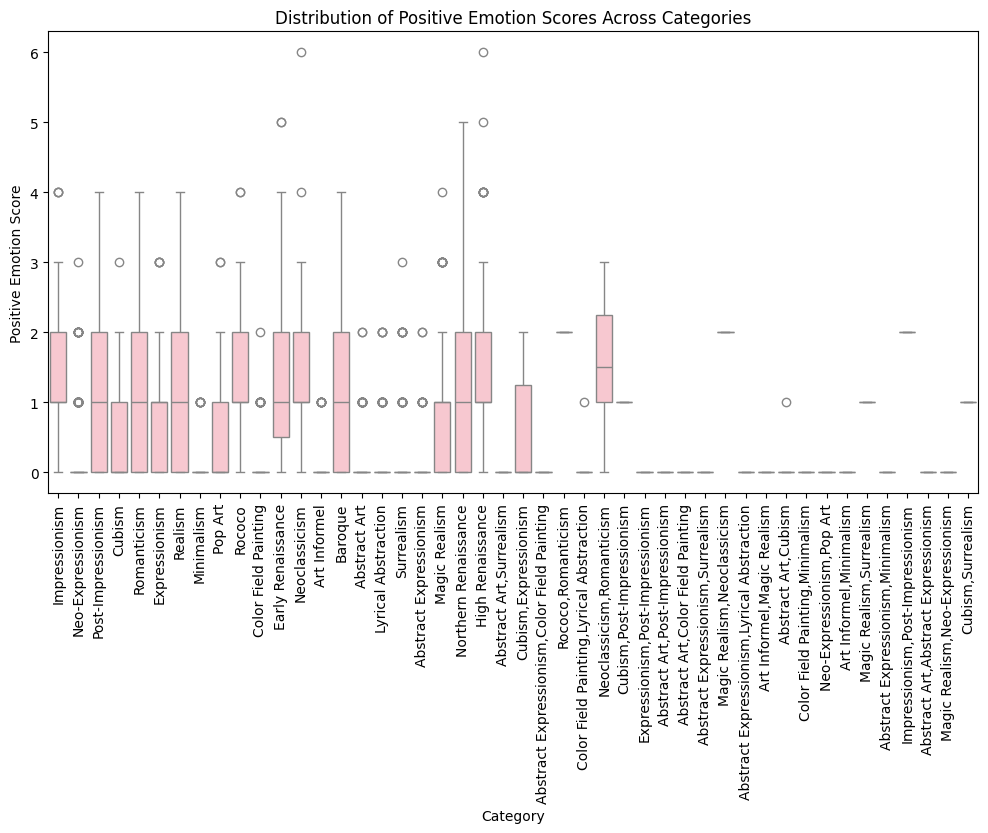

In [ ]:
#Boxplot for Distribution of Emotions Across Categories

plt.figure(figsize=(12,6))
sns.boxplot(x="Category", y="Positive", data=df_cleaned, color="pink")
plt.xticks(rotation=90)
plt.title("Distribution of Positive Emotion Scores Across Categories")
plt.xlabel("Category")
plt.ylabel("Positive Emotion Score")
plt.show()

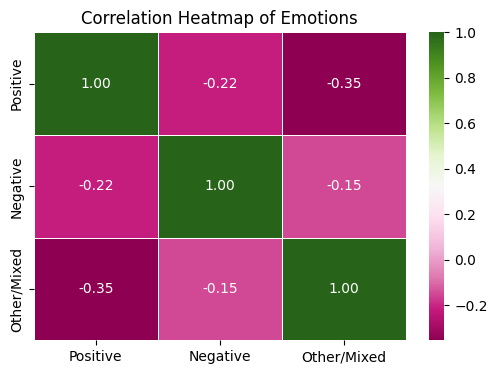

In [ ]:
#Heatmap Correlation between Emotions
plt.figure(figsize=(6, 4))
sns.heatmap(df_cleaned[["Positive", "Negative", "Other/Mixed"]].corr(), annot=True, cmap="PiYG", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Emotions")
plt.show()

In [ ]:
df_cleaned.to_csv("Cleaned_WikiArt_Emotions.tsv", sep="\t", index=False)

# Download the file in Colab
from google.colab import files
files.download("Cleaned_WikiArt_Emotions.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>